# Imports
uses kerenel in /ihome/rbao/bri8/envs/r_seurat conda environment
Potentially useful resource: https://ucdavis-bioinformatics-training.github.io/2018-June-RNA-Seq-Workshop/thursday/DE.html

In [2]:
suppressPackageStartupMessages({
    library(limma)
    library(edgeR)
    library(lme4)
    library(dplyr)
    library(readxl)
    library(pheatmap)
    library(openxlsx)
    library(ggplot2)
    library(repr)
    library(RColorBrewer)
    library(ggrepel)
    }
)
data <- file.path('.','local_data')

# Load, run DEG and plot volcano for CD45+CD8+ vs. CD45+CD8-

,collect slide 6 | 001 | Full ROI,collect slide 6 | 002 | Full ROI,collect slide 6 | 003 | Full ROI,collect slide 6 | 004 | Full ROI,collect slide 6 | 005 | Full ROI,collect slide 6 | 006 | Full ROI,collect slide 6 | 007 | Full ROI,collect slide 6 | 008 | Full ROI,collect slide 6 | 009 | Full ROI,collect slide 6 | 010 | Full ROI,⋯,collect slide 4 | 005 | Full ROI,collect slide 4 | 006 | Full ROI,collect slide 4 | 007 | Full ROI,collect slide 4 | 009 | Full ROI,collect slide 4 | 010 | Full ROI,collect slide 4 | 011 | Full ROI,collect slide 4 | 012 | Full ROI,collect slide 4 | 013 | Full ROI,collect slide 4 | 014 | Full ROI,collect slide 4 | 015 | Full ROI
RB1,0.4727288,4.285048,1.6118856,2.0264009,1.1933137,3.2709664,2.0286206,1.1651869,0.6811405,0.8311144,⋯,0.9481952,1.767082,1.6585819,1.0014699,0.4461611,2.807381,2.3401386,0.9165533,0.8954606,1.614873
GADD45G,6.7065524,8.565832,3.0358081,6.1747064,3.2137047,6.8442103,5.2755500,0.9388812,10.6646048,8.3849014,⋯,6.3787100,2.402726,3.0816020,4.1977245,4.9801839,2.944532,1.4557982,2.5622534,3.5197832,2.833002
C6,0.4620765,5.595075,2.6177324,2.4534245,2.4086882,1.4735378,2.0816919,3.6454395,0.6811405,3.6600383,⋯,10.0875522,5.259120,5.6174920,0.4253384,0.8318153,3.635654,0.4896969,2.2647360,0.8681389,2.043227
GLUL,0.4620765,0.881155,0.4692459,0.2236178,0.3135417,0.3605400,0.2243558,0.9388812,0.6811405,0.8311144,⋯,0.9481952,1.767082,0.1692232,0.4253384,0.4461611,2.807381,0.4896969,0.3224352,1.1905654,0.786783
CD3D,24.3961247,15.335720,31.9469552,32.8461714,30.2748494,21.0297569,23.0397857,24.9588156,10.5863175,14.3196551,⋯,0.9481952,1.767082,25.1962364,35.6438761,33.0409009,15.555172,28.3296112,36.9204973,37.0575325,35.287582
LY9,0.4620765,1.952663,3.2044043,1.1560204,0.4291666,0.3868652,1.4402340,6.1093699,0.6811405,1.6633795,⋯,4.9280996,13.728324,1.2388170,3.0047482,0.4461611,5.531362,0.4896969,1.6414046,2.5469714,2.198016


[1] 1812   93

[1] "Overlap of counts columns with segment info rows:"


[1] 100

New names:
• `` -> `...1`


[1] 1812   56

Coefficients not estimable: slides4 slides6 


Warning message:
“Partial NA coefficients for 1812 probe(s)”


Coefficients not estimable: slides4 slides6 


Warning message:
“Partial NA coefficients for 1812 probe(s)”


[1] 217


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CXCL14,1.657688,10.69980,4.219856,7.002196e-05,0.005516513,1.512673
IL32,2.069162,11.40031,4.730852,1.079097e-05,0.002793319,3.222781


Warning message:
“Removed 1781 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


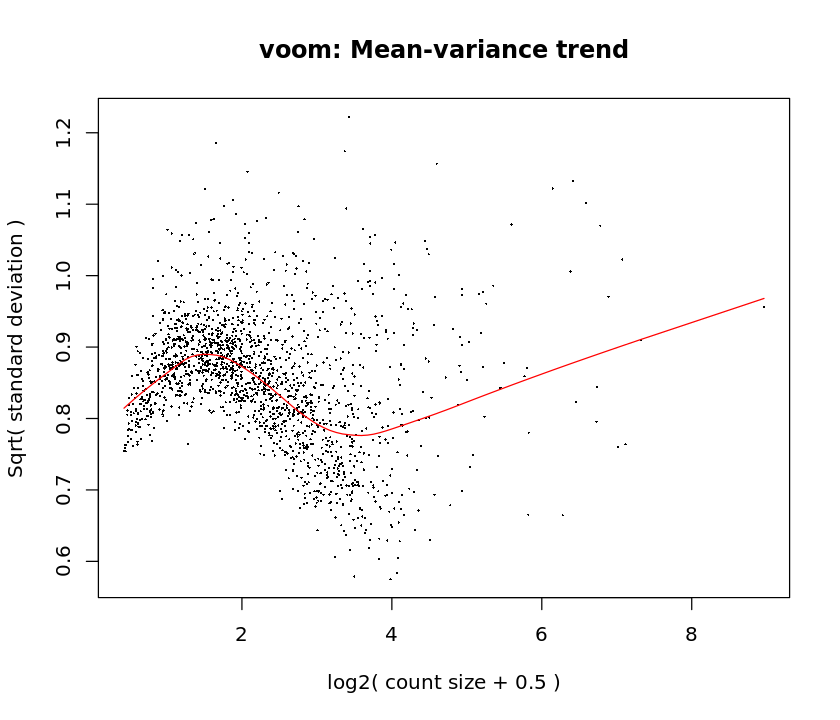

[1] 1812   37

Coefficients not estimable: slides4 slides6 


Warning message:
“Partial NA coefficients for 1812 probe(s)”


Coefficients not estimable: slides4 slides6 


Warning message:
“Partial NA coefficients for 1812 probe(s)”


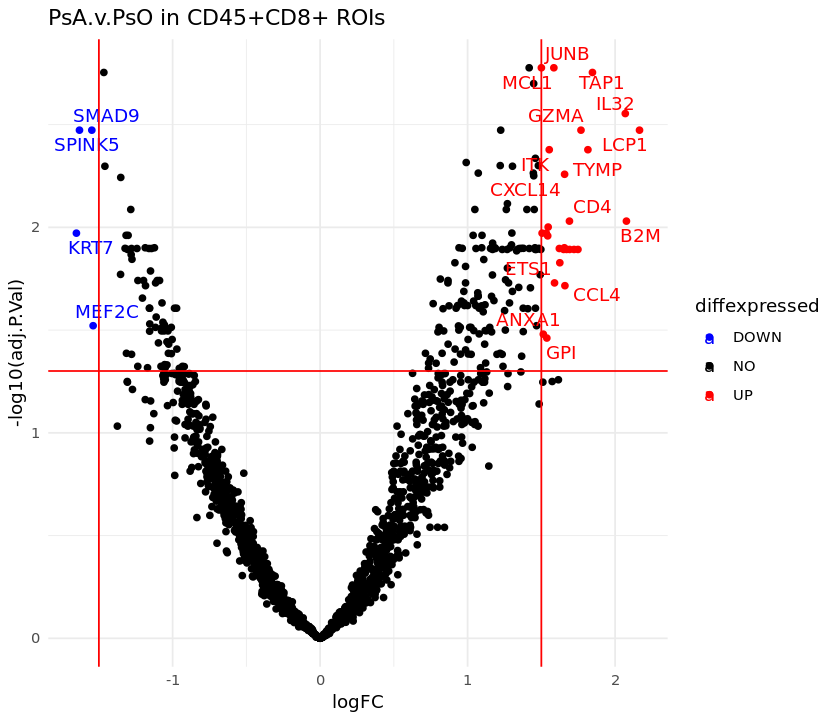

[1] 141


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CXCL14,1.3423237,10.68499,2.8169016,0.007035992,0.07285267,-2.695372
IL32,-0.6115835,10.07003,-0.8129402,0.420296614,0.64815103,-5.808969


Warning message:
“Removed 1731 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“ggrepel: 57 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


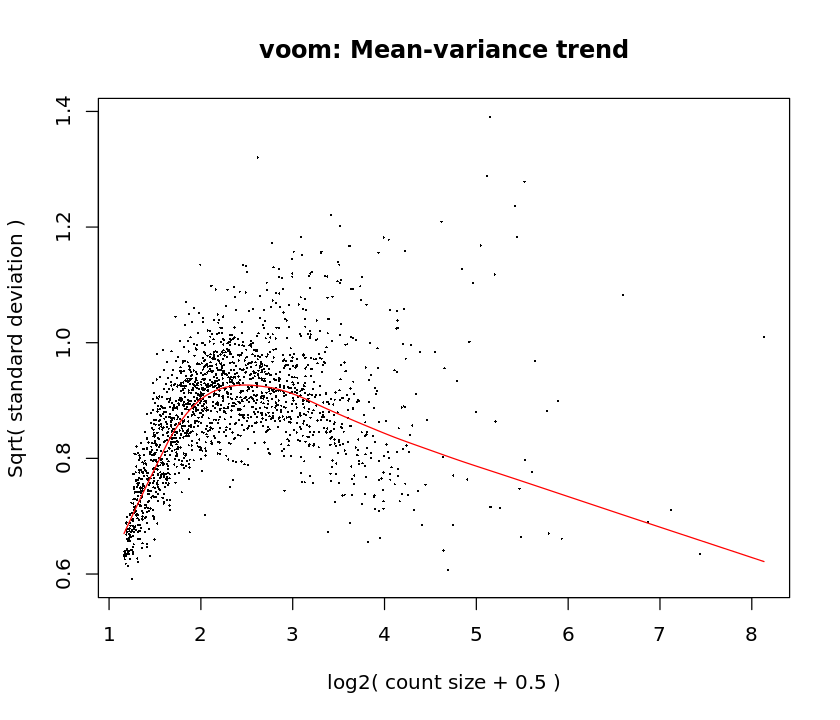

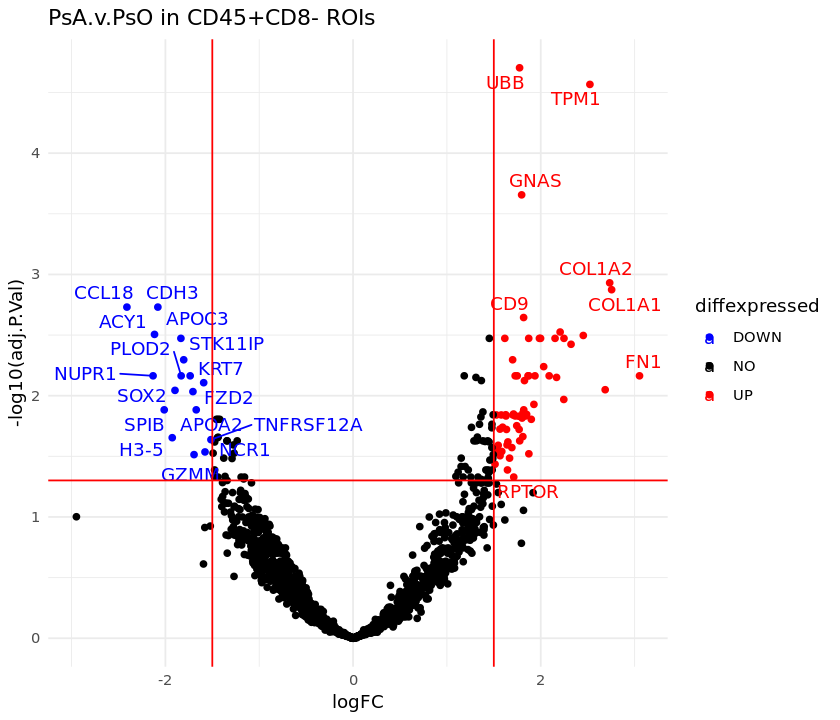

In [12]:
options(repr.plot.width=7, repr.plot.height=6)
use_file = 'URMC_01_BKG_SUB_HKQ3_NORM_BI.xlsx'
sing = TRUE
use.voom = TRUE
log_thresh = 1.5
p = 0.05
exclude = c('collect slide 4 | 008 | Full ROI',
           'collect slide 1 | 009 | Full ROI')

info <- read.csv(file.path(data,'roi_annotation_list_v3.csv'),
                row.names=1)
info <- info[-which(row.names(info) %in% exclude),]
dataset <- read_excel(file.path(data,use_file),
                     sheet='TargetCountMatrix',
                    )

targets <- dataset$TargetName
dataset['TargetName'] <- NULL
dataset <- as.matrix(dataset)
dataset <- dataset[,-which(colnames(dataset) %in% exclude)]
rownames(dataset) <-targets
head(dataset)
dim(dataset)
segmentAnnotations <- read_excel(file.path(data,use_file),
                     sheet='SegmentProperties',
                    )

segmentAnnotations <- dplyr::inner_join(segmentAnnotations, info[c('SegmentDisplayName', 'Condition', 'section')],'SegmentDisplayName')
segmentAnnotations = data.frame(segmentAnnotations)
row.names(segmentAnnotations) <- segmentAnnotations$SegmentDisplayName
### Update labels 11/6/2023:
idx <- segmentAnnotations$Condition == 'Ps'
segmentAnnotations[idx,'Condition'] <- 'PsO'


targetAnnotations <- read_excel(file.path(data,use_file),
                     sheet='TargetProperties',
                    )
print('Overlap of counts columns with segment info rows:')
sum(segmentAnnotations$SegmentDisplayName == colnames(dataset)) / dim(dataset)[2] * 100

############## Load cell deconvolution outputs:
matrixname = "ImmuneTumor_safeTME"
fn <- file.path(data, paste0(matrixname,".spatialdecon.xlsx"), fsep = .Platform$file.sep)
dat <- read_excel(fn,
                  sheet='Proportions',
                 )
dat <- as.data.frame(dat)
rownames(dat) <- dat[,'...1']
dat[,'...1'] <- NULL
dat = as.data.frame(t(dat))
cd8.t.thresh = 0
cd8.t.group = row.names(dat[dat$T.CD8.memory>cd8.t.thresh,])

######################### Run Limma for CD45+CD8+ PsA v. PsO
subset = dataset[,which(colnames(dataset) %in% cd8.t.group )]
dim(subset)
if (use.voom){
    d <- DGEList(subset)
    d <- calcNormFactors(d)
}else{
    d <- DGEList(log1p(subset))
}
sampinfo = segmentAnnotations[colnames(subset),]
d$samples[,'condition'] <- sampinfo$Condition

temp = merge(d$samples,sampinfo, by = 'row.names')
sections = factor((temp$section))
snames = row.names(d$samples)
slides =  factor(as.numeric(factor(substr(snames, 1, nchar(snames) - 17))))
roi =  factor(as.numeric(factor(substr(snames, 19, nchar(snames) - 10))))
cond = d$samples$condition
group <- cond
mm <- model.matrix(~0 + group + slides   ) #slides + roi 
if (use.voom){
    y <- voom(d, mm, plot = T)
    fit <- lmFit(y, mm)
}else{
    fit <- lmFit(d$counts,mm)
}
contr <- makeContrasts(PsA.v.PsO = groupPsA - groupPsO,
                       levels = colnames(coef(fit)))
tmp <- contrasts.fit(fit, contr)
tmp <- eBayes(tmp)
g = 'PsA.v.PsO'
top.table <- topTable(tmp,
                      coef=g, 
                      n =Inf,
                      sort.by='P',
                      resort.by='logFC')
print(length(which(top.table$adj.P.Val < p)))
top.table[c('CXCL14','IL32'),]
grp = 'PsA.v.PsO'
de <- topTable(tmp,
                 coef=grp, 
                 n =Inf,
                 sort.by='P',
                 resort.by='logFC')
de$diffexpressed <- "NO"
de$diffexpressed[de$logFC > log_thresh & de$adj.P.Val < p] <- "UP"
de$diffexpressed[de$logFC < -log_thresh & de$adj.P.Val < p] <- "DOWN"
de$delabel <- NA
de$delabel[de$diffexpressed != "NO"] <- row.names(de)[de$diffexpressed != "NO"]
p1 <- ggplot(data=de, aes(x=logFC, y=-log10(adj.P.Val), col=diffexpressed, label=delabel)) +
        geom_point() + 
        theme_minimal() +
        geom_text_repel() +
        scale_color_manual(values=c("blue", "black", "red")) +
        geom_vline(xintercept=c(-log_thresh, log_thresh), col="red") +
        geom_hline(yintercept=-log10(0.05), col="red") +
        ggtitle(ggtitle( 'PsA.v.PsO in CD45+CD8+ ROIs'))
print(p1)

# fn=file.path(results,'cd45+cd8+_psa_v_pso_volcano_hkq3.png')
# png(fn, units="in", width=7, height=6,res =600)
# p1
# dev.off()
# p1
# write.csv(de,file.path(results,'cd45+cd8+_psa_v_pso_volcano_hkq3.csv'))


######################### Run Limma for CD45+CD8- PsA v. PsO
subset = dataset[,which(!(colnames(dataset) %in% cd8.t.group ))]
dim(subset)
if (use.voom){
    d <- DGEList(subset)
    d <- calcNormFactors(d)
}else{
    d <- DGEList(log1p(subset))
}
sampinfo = segmentAnnotations[colnames(subset),]
d$samples[,'condition'] <- sampinfo$Condition

temp = merge(d$samples,sampinfo, by = 'row.names')
sections = factor((temp$section))
snames = row.names(d$samples)
slides =  factor(as.numeric(factor(substr(snames, 1, nchar(snames) - 17))))
roi =  factor(as.numeric(factor(substr(snames, 19, nchar(snames) - 10))))
cond = d$samples$condition
group <- cond

mm <- model.matrix(~0 + group + slides   ) #slides + roi 
if (use.voom){
    y <- voom(d, mm, plot = T)
    fit <- lmFit(y, mm)
}else{
    fit <- lmFit(d$counts,mm)
}
contr <- makeContrasts(PsA.v.PsO = groupPsA - groupPsO,
                       levels = colnames(coef(fit)))
tmp <- contrasts.fit(fit, contr)
tmp <- eBayes(tmp)
g = 'PsA.v.PsO'
top.table <- topTable(tmp,
                      coef=g, 
                      n =Inf,
                      sort.by='P',
                      resort.by='logFC')
print(length(which(top.table$adj.P.Val < p)))
top.table[c('CXCL14','IL32'),]
grp = 'PsA.v.PsO'
de <- topTable(tmp,
                 coef=grp, 
                 n =Inf,
                 sort.by='P',
                 resort.by='logFC')
de$diffexpressed <- "NO"
de$diffexpressed[de$logFC > log_thresh & de$adj.P.Val < p] <- "UP"
de$diffexpressed[de$logFC < -log_thresh & de$adj.P.Val < p] <- "DOWN"
de$delabel <- NA
de$delabel[de$diffexpressed != "NO"] <- row.names(de)[de$diffexpressed != "NO"]
p1 <- ggplot(data=de, aes(x=logFC, y=-log10(adj.P.Val), col=diffexpressed, label=delabel)) +
        geom_point() + 
        theme_minimal() +
        geom_text_repel() +
        scale_color_manual(values=c("blue", "black", "red")) +
        geom_vline(xintercept=c(-log_thresh, log_thresh), col="red") +
        geom_hline(yintercept=-log10(0.05), col="red") +
        ggtitle( 'PsA.v.PsO in CD45+CD8- ROIs')
print(p1)
# fn=file.path(results,'cd45+cd8-_psa_v_pso_volcano_hkq3.png')
# png(fn, units="in", width=7, height=6,res =600)
# p1
# dev.off()
# p1
# write.csv(de,file.path(data,'cd45+cd8-_psa_v_pso_volcano_hkq3.csv'))